In [8]:
import torch
import random
import pandas as pd
import numpy as np
import main_forecasting as mf
import matplotlib.pyplot as plt

In [2]:
# seed 고정
random_seed = 42

torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [3]:
# Case 1. model = lstm
config1 = {
    "model": 'lstm',
    "training": True,  # 학습 여부, 저장된 학습 완료 모델 존재시 False로 설정
    "best_model_path": './ckpt/lstm.pt',  # 학습 완료 모델 저장 경로
    "parameter": {
        "input_size" : 1,  # 데이터 변수 개수, int
        "window_size" : 48,  # input sequence의 길이, int
        "forecast_step" : 24,  # 예측할 미래 시점의 길이, int
        "num_layers" : 2,  # recurrent layers의 수, int(default: 2, 범위: 1 이상)
        "hidden_size" : 64,  # hidden state의 차원, int(default: 64, 범위: 1 이상)
        "dropout" : 0.1,  # dropout 확률, float(default: 0.1, 범위: 0 이상 1 이하)
        "bidirectional" : True,  # 모델의 양방향성 여부, bool(default: True)
        "num_epochs" : 150,  # 학습 epoch 횟수, int(default: 150, 범위: 1 이상)
        "batch_size" : 64,  # batch 크기, int(default: 64, 범위: 1 이상, 컴퓨터 사양에 적합하게 설정)
        "lr" : 0.0001,  # learning rate, float(default: 0.0001, 범위: 0.1 이하)
        "device" : 'cuda'  # 학습 환경, (default: 'cuda', ['cuda', 'cpu'] 중 선택)
    }
}

# Case 2. model = gru
config2 = {
    "model": 'gru',
    "training": True,  # 학습 여부, 저장된 학습 완료 모델 존재시 False로 설정
    "best_model_path": './ckpt/gru.pt',  # 학습 완료 모델 저장 경로
    "parameter": {
        "input_size" : 1,  # 데이터 변수 개수, int
        "window_size" : 48,  # input sequence의 길이, int
        "forecast_step" : 24,  # 예측할 미래 시점의 길이, int
        "num_layers" : 2,  # recurrent layers의 수, int(default: 2, 범위: 1 이상)
        "hidden_size" : 64,  # hidden state의 차원, int(default: 64, 범위: 1 이상)
        "dropout" : 0.1,  # dropout 확률, float(default: 0.1, 범위: 0 이상 1 이하)
        "bidirectional" : True,  # 모델의 양방향성 여부, bool(default: True)
        "num_epochs" : 150,  # 학습 epoch 횟수, int(default: 150, 범위: 1 이상)
        "batch_size" : 64,  # batch 크기, int(default: 64, 범위: 1 이상, 컴퓨터 사양에 적합하게 설정)
        "lr" : 0.0001,  # learning rate, float(default: 0.0001, 범위: 0.1 이하)
        "device" : 'cuda'  # 학습 환경, (default: 'cuda', ['cuda', 'cpu'] 중 선택)
    }
}

# Case 3. model = informer
config3 = {
    "model": 'informer',
    "training": True,  # 학습 여부, 저장된 학습 완료 모델 존재시 False로 설정
    "best_model_path": './ckpt/informer.pt',  # 학습 완료 모델 저장 경로
    "parameter": {
        "input_size" : 1,  # 데이터 변수 개수, int
        "window_size" : 48,  # input sequence의 길이, int
        "forecast_step" : 24,  # 예측할 미래 시점의 길이, int
        "label_len" : 48,  # Decoder의 start token 길이, int(default: 48)
        "d_model" : 512,  # 모델의 hidden dimension, int(default: 512)
        "e_layers" : 2,  # encoder layer 수, int(default: 2)
        "d_layers" : 1,  # decoder layer 수, int(default: 1)
        "d_ff" : 2048,  # fully connected layer의 hidden dimension, int(default: 2048)
        "num_epochs" : 150,  # 학습 epoch 횟수, int(default: 150, 범위: 1 이상)
        "batch_size" : 64,  # batch 크기, int(default: 64, 범위: 1 이상, 컴퓨터 사양에 적합하게 설정)
        "lr" : 0.0001,  # learning rate, float(default: 0.0001, 범위: 0.1 이하)
        "device" : 'cuda'  # 학습 환경, (default: 'cuda', ['cuda', 'cpu'] 중 선택)
    }
}

# Case 4. model = scinet
config4 = {
    "model": 'scinet',
    "training": True,  # 학습 여부, 저장된 학습 완료 모델 존재시 False로 설정
    "best_model_path": './ckpt',  # 학습 완료 모델 저장 경로
    "parameter": {
        "input_size" : 1,  # 데이터 변수 개수, int
        "window_size" : 48,  # input sequence의 길이, int
        "forecast_step" : 24,  # 예측할 미래 시점의 길이, int
        "levels" : 2, # Tree의 depth, int(default: 2, 범위: input sequence의 로그 값 이하, 2~4 설정 권장)
        "stacks" : 1, # SCINet 구조를 쌓는 횟수, int(default: 1, 범위: 3 이하)
        "num_epochs" : 150,  # 학습 epoch 횟수, int(default: 150, 범위: 1 이상)
        "batch_size" : 64,  # batch 크기, int(default: 64, 범위: 1 이상, 컴퓨터 사양에 적합하게 설정)
        "lr" : 0.0001,  # learning rate, float(default: 0.0001, 범위: 0.1 이하)
        "device" : 'cuda'  # 학습 환경, (default: 'cuda', ['cuda', 'cpu'] 중 선택)
    }
}

In [4]:
# Dataset
dataset_dir = {
    "train": './data/train_data.csv',
    "test": './data/test_data.csv'
}

# train/test 데이터 불러오기 (csv 형태)
# shape=(# time steps, )
train_data = pd.read_csv(dataset_dir["train"])
train_data = train_data["Appliances"].values

test_data = pd.read_csv(dataset_dir["test"])
test_date = test_data["date"].values
test_data = test_data["Appliances"].values

In [5]:
# Case 1. model = scinet
config = config4
data_forecast = mf.Forecasting(config, train_data, test_data, test_date)
init_model = data_forecast.build_model()  # 모델 구축

if config["training"]:
    best_model = data_forecast.train_model(init_model)  # 모델 학습
    data_forecast.save_model(best_model, best_model_path=config["best_model_path"])  # 모델 저장

pred, mse, mae = data_forecast.pred_data(init_model, best_model_path=config["best_model_path"])  # 예측

SCINet(
  (blocks1): EncoderTree(
    (SCINet_Tree): SCINet_Tree(
      (workingblock): LevelSCINet(
        (interact): InteractorLevel(
          (level): Interactor(
            (split): Splitting()
            (phi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 1, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(1, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (psi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 1, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(1, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (P): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1)

In [ ]:
# Case 4. model = scinet
config = config4
data_forecast = mf.Forecasting(config, train_data, test_data, test_date)
init_model = data_forecast.build_model()  # 모델 구축

if config["training"]:
    best_model = data_forecast.train_model(init_model)  # 모델 학습
    data_forecast.save_model(best_model, best_model_path=config["best_model_path"])  # 모델 저장

pred, mse, mae = data_forecast.pred_data(init_model, best_model_path=config["best_model_path"])  # 예측

MSE : 9545.594828205083 , MAE : 58.28867803734648


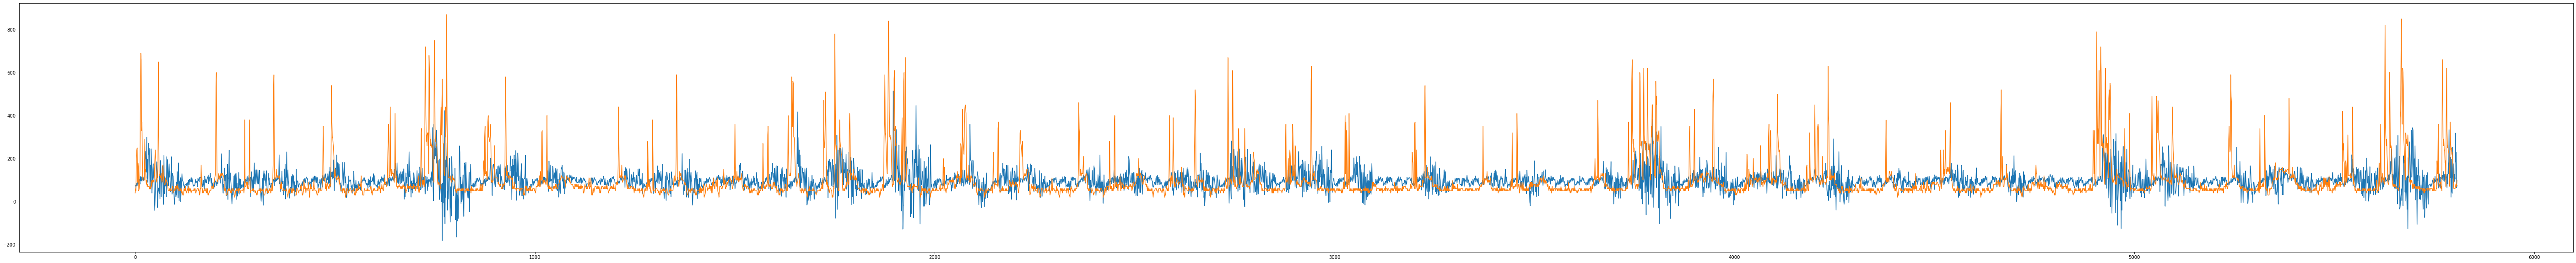

In [9]:
plt.figure(figsize=(100,10))
pred['predicted_value'].plot()
pred['real_value'].plot()

print(f'MSE : {mse} , MAE : {mae}')

